# Tarea 5


MA5203 - Aprendizaje de Máquinas Probabilístico

Profesor: Felipe Tobar

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, classification, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import pdb

# P1 Experimento controlado

In [20]:
def generar_datos(n, lambdaP):
    mean_1 = np.array([0,lambdaP])
    mean_2 = np.array([0,-lambdaP])
    std = np.eye(2)

    X0= np.random.multivariate_normal(mean_1, std, size = n)
    X1= np.random.multivariate_normal(mean_2, std, size = n)

    # creamos las etiquetas, las cuales tendrán valor 1 si pertenecen a la distribución X0 y 0 si pertenecen a X1
    y_labels = np.zeros(2*n)
    y_labels[:n] = 1
    
    return (X0, X1, y_labels)

### a) 

In [3]:
n=1000
lambdaP = 1.5
X0, X1, y_labels = generar_datos(n, lambdaP)

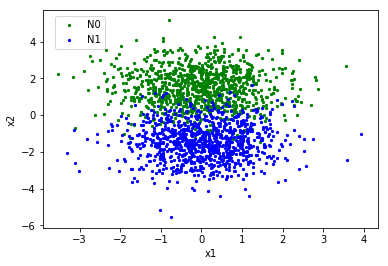

In [4]:
# pdb.set_trace()
plt.figure()
plt.scatter(X0[:,0],X0[:,1], c ='g', s=5)
plt.scatter(X1[:,0],X1[:,1], c ='b', s=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["N0","N1"], bbox_to_anchor=(0.2, 0.8))
plt.savefig('train_test_data.pdf')

### b) 

In [5]:
def split_data(X0, X1, y_labels, n):
    Xtotal = np.concatenate((X0,X1))
    X_train, X_test, y_train, y_test = train_test_split(Xtotal, y_labels, test_size = 0.25, random_state = 4)

    sc = StandardScaler()

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    X_train = X_train[:int(n/4*3)]
    y_train = y_train[:int(n/4*3)]
    X_test = X_test[:int(n/4)]
    y_test = y_test[:int(n/4)]
    
    return X_train, y_train, X_test, y_test

In [6]:
X_train, y_train, X_test, y_test = split_data(X0, X1, y_labels, 100)

### Entrenamiento y Error para distintos valores de C

In [7]:
c_array = np.arange(0.1, 100, 0.5)
results_test = []
results_train = []
errores_test = []
errores_train = []

for idx, c_val in enumerate(c_array):
    classifier = SVC(C=c_val, kernel = 'rbf', random_state = 0,verbose=False)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    errores_test_aux = sum(np.diag(np.fliplr(classification.confusion_matrix(y_test, y_pred))))
    errores_test.append(errores_test_aux)
    results_test.append([y_test, y_pred])
    
    y_pred2 = classifier.predict(X_train)
    errores_train_aux = sum(np.diag(np.fliplr(classification.confusion_matrix(y_train, y_pred2))))
    errores_train.append(errores_train_aux)
    results_train.append([y_train, y_pred2])
    
    if (idx == 0 or idx+1 == len(c_array)):
#         pdb.set_trace()
        print("Acuracy Test")
        print(classification_report(y_test, y_pred))
        
        print("Acuracy Train")
        print(classification_report(y_train, y_pred2))

Acuracy Test
             precision    recall  f1-score   support

        0.0       1.00      0.85      0.92        13
        1.0       0.86      1.00      0.92        12

avg / total       0.93      0.92      0.92        25

Acuracy Train
             precision    recall  f1-score   support

        0.0       0.93      0.81      0.86        31
        1.0       0.88      0.95      0.91        44

avg / total       0.90      0.89      0.89        75

Acuracy Test
             precision    recall  f1-score   support

        0.0       1.00      0.77      0.87        13
        1.0       0.80      1.00      0.89        12

avg / total       0.90      0.88      0.88        25

Acuracy Train
             precision    recall  f1-score   support

        0.0       0.94      0.97      0.95        31
        1.0       0.98      0.95      0.97        44

avg / total       0.96      0.96      0.96        75



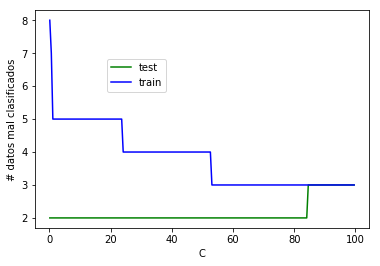

In [18]:
# pdb.set_trace()
plt.figure()
plt.plot(c_array,errores_test, 'g')
plt.plot(c_array,errores_train, 'b')
plt.xlabel("C")
plt.ylabel("# datos mal clasificados")
plt.legend(["test","train"], bbox_to_anchor=(0.2, 0.8))
plt.savefig('c_errores.pdf')

### c) 

In [23]:
lambda_array = [0.5, 1, 1.5]
n_array = [250, 500, 1000]
kernel_arr = ['rbf', 'linear', 'poly']

total_points = 1000
data_dict = {'kernel':[], 'lambda':[], 'n':[], 'test_err %':[]}

c_val = 60

for lambdaP in lambda_array:
    X0, X1, y_labels = generar_datos(total_points, lambdaP)        
    for nVal in n_array:
        X_train, y_train, X_test, y_test = split_data(X0, X1, y_labels, nVal)
        for curr_kernel in kernel_arr:    
            classifier = SVC(C=c_val, kernel = curr_kernel, random_state = 0,verbose=False)
            classifier.fit(X_train, y_train)

            y_pred = classifier.predict(X_test)
            errores_test_aux = sum(np.diag(np.fliplr(classification.confusion_matrix(y_test, y_pred))))
#             print("Kernel: " + curr_kernel + 
#                   " lambda: " + str(lambdaP) + 
#                   " n: " + str(nVal) + 
#                   " test_err: " + str(errores_test_aux/nVal * 100) + " %")
            data_dict['kernel'].append(curr_kernel)
            data_dict['lambda'].append(lambdaP)
            data_dict['n'].append(nVal)
            data_dict['test_err %'].append(errores_test_aux/len(y_pred) * 100)
            
df = pd.DataFrame(data_dict)
df.head(n=27 and kernel == 'poly')

,kernel,lambda,n,test_err %
0,rbf,0.5,250,43.548387
1,linear,0.5,250,37.096774
2,poly,0.5,250,35.483871
3,rbf,0.5,500,35.200000
4,linear,0.5,500,32.000000
5,poly,0.5,500,31.200000
6,rbf,0.5,1000,31.200000
7,linear,0.5,1000,32.000000
8,poly,0.5,1000,32.800000
9,rbf,1.0,250,25.806452


# P2 Datos reales

In [145]:
dataset = pd.read_excel('data_salaries.xlsx', sheet_name='Sheet2')

### Conversión de variables categóricas

In [146]:
# dataset.head(n=20)
# pdb.set_trace()
# True
labelencoder_X = LabelEncoder()

dataset['income'] = dataset['income'].apply(lambda x: 1 if x == ' >50K' else 0)
dataset['sex'] = dataset['sex'].apply(lambda x: 1 if x == ' Male' else 0)

country_data = labelencoder_X.fit_transform(dataset['country'])
education_data = labelencoder_X.fit_transform(dataset['education'])
race_data = labelencoder_X.fit_transform(dataset['race'])
workClass_data = labelencoder_X.fit_transform(dataset['Workclass'])
relationship_data = labelencoder_X.fit_transform(dataset['relationship'])
marital_data = labelencoder_X.fit_transform(dataset['marital'])
ocupation_data = labelencoder_X.fit_transform(dataset['ocupation'])
# eduNum_data = labelencoder_X.fit_transform(dataset['eduaction_num'])

filtered_dataset = np.transpose(np.array([country_data, 
                                          education_data, 
                                          relationship_data,
                                          ocupation_data,
                                          workClass_data,
                                          race_data,
                                          marital_data,
                                          dataset['sex'],
                                          dataset['hr_per_week'], 
                                          dataset['Age']]))
onehotencoder = OneHotEncoder(categorical_features= [0, 1, 2, 3, 4, 5, 6])
filtered_dataset = onehotencoder.fit_transform(filtered_dataset).toarray()

dF = pd.DataFrame(filtered_dataset)

In [156]:
dF.head(n=20)
# dataset.head(n=20)

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,40.0,39.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,50.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0,38.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40.0,53.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,28.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,37.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,49.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,45.0,52.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,31.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40.0,42.0


In [151]:
# Separamos los datos en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(filtered_dataset, dataset['income'], test_size = 0.20, random_state = 0)

# Es importante escalar los datos al usar SVM
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Entrenamiento

In [152]:
classifier = SVC(C=1, kernel = 'rbf', random_state = 0,verbose=True)
classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=True)

In [153]:
y_pred = classifier.predict(X_test)

### Accuracy

In [155]:
vmat = classification.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.93      0.89      4918
          1       0.70      0.52      0.59      1595

avg / total       0.82      0.83      0.82      6513

